## **1 - Loading Data & Initial Assessment Step**

In [1]:
###Importing Used Libriries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### **1.1**

In [2]:
#Loading data
df = pd.read_csv('/kaggle/input/usedcarscatalog/cars.csv')
pd.set_option('display.max_columns', 30) ## see all features
pd.set_option('display.max_rows', 40)

#### **1.2**

In [3]:
## Seeing if there is any missing values
df.isnull().sum()
## 10 missing values in the column 'engine_capacity'

manufacturer_name     0
model_name            0
transmission          0
color                 0
odometer_value        0
year_produced         0
engine_fuel           0
engine_has_gas        0
engine_type           0
engine_capacity      10
body_type             0
has_warranty          0
state                 0
drivetrain            0
price_usd             0
is_exchangeable       0
location_region       0
number_of_photos      0
up_counter            0
feature_0             0
feature_1             0
feature_2             0
feature_3             0
feature_4             0
feature_5             0
feature_6             0
feature_7             0
feature_8             0
feature_9             0
duration_listed       0
dtype: int64

#### **1.3**

In [4]:
## Checking duplicated data
df[df.duplicated()]

print(f'Nº of duplicated rows: {df.duplicated().sum()}')

Nº of duplicated rows: 40


#### **1.4**

In [5]:
## General info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

#### **1.5**

array([[<Axes: title={'center': 'odometer_value'}>,
        <Axes: title={'center': 'year_produced'}>,
        <Axes: title={'center': 'engine_capacity'}>],
       [<Axes: title={'center': 'price_usd'}>,
        <Axes: title={'center': 'number_of_photos'}>,
        <Axes: title={'center': 'up_counter'}>],
       [<Axes: title={'center': 'duration_listed'}>, <Axes: >, <Axes: >]],
      dtype=object)

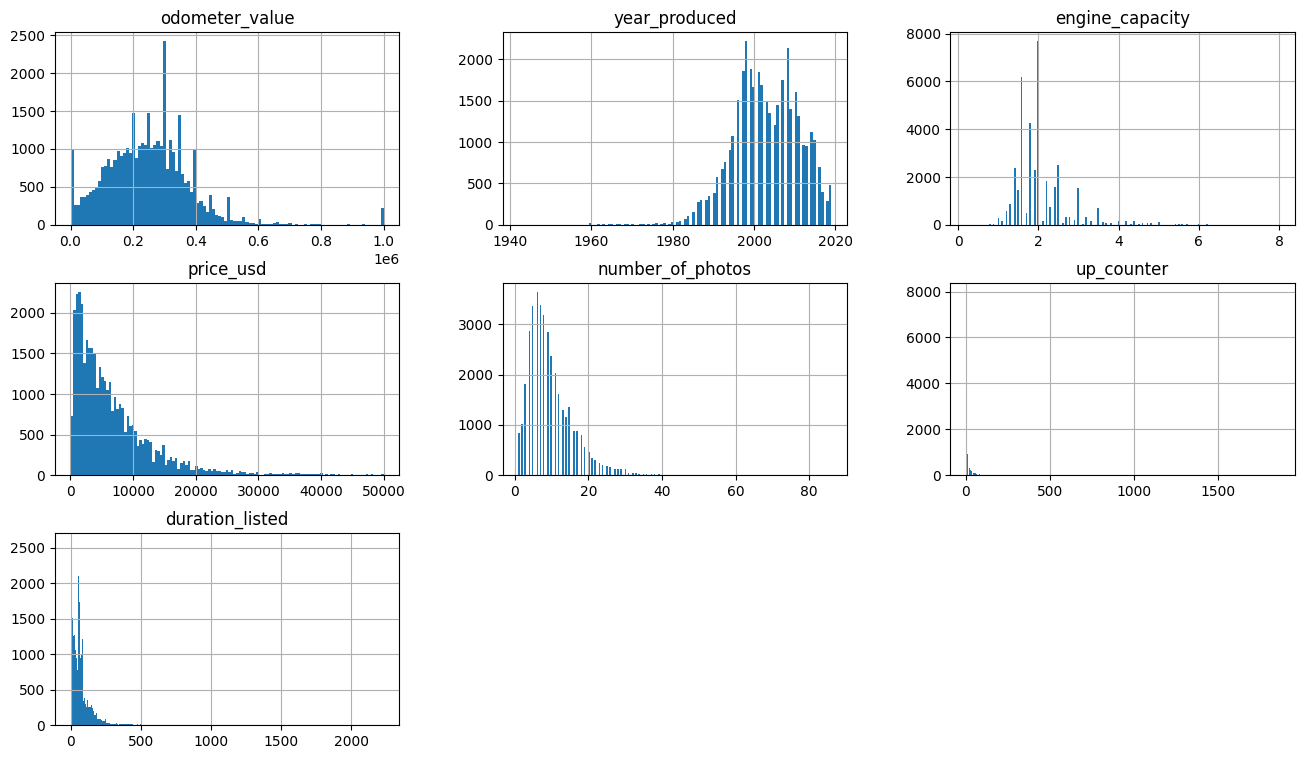

In [6]:
## Plotting numerical features histogram's
df.hist(bins='auto', figsize=(16,9))

#### **1.6**

In [7]:
## Showing the boolean data distribution
bool_distrib_data = df.select_dtypes(bool)
## Sum of true values over every axis and the sum of false values is the opposite of that
bool_distrib_data = pd.DataFrame({True: bool_distrib_data.sum(), False: df.shape[0] - bool_distrib_data.sum()})
bool_distrib_data.transpose()

,engine_has_gas,has_warranty,is_exchangeable,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
True,1347,449,13586,8806,23396,8624,10627,9304,13720,6588,10162,16003,22325
False,37184,38082,24945,29725,15135,29907,27904,29227,24811,31943,28369,22528,16206


#### **1.7 - Comments about the dataset:**

* This dataset has about 10 missing values in the "engine_capacity" feature and 40 duplicated rows, with most of the features being boolean or categorical (strings).

* Looking at the numerical data we can tell that the majority of cars have less than 600.000 kilometers driven and have the year of production range between 1940 to 2020 (with the majority being of produced in the 00's), the engine has a capacity about 2 liters, having most of the prices are below 30K USD and less than 20 photos (per car), and the upper counter feature has a "weird" distribution, which can give a hint that its values vary a lot along the samples. Also, the majority of the cars are sold in less than 500 days.

* Analyzing the boolean features, we see that most cars aren't equipped with propane tank and tubing, have no warranty and the car's owner isn't ready to exchange the car to other cars with little or no additional payment. In addition to that, there's also 10 features that represents the presence or absense of alloy wheels, air conditioner, etc in the car, but without a describing name tagged to each one. We probably want to see the correlations of those features with the output variable to define their importance.   

## **2 - Cleaning & Data Splitting**

#### **2.1**

In [8]:
## Removing duplicated rows
df.drop_duplicates(inplace=True)

#### **2.2**

In [9]:
## Selecting data only where the car's state is owned
filt_owned_cars = df['state'].str.contains('owned', na=False) ## see if row contains 'owned' and ignore NaN values.
df = df[filt_owned_cars]

#### **2.3**

In [10]:
## Selecting subsset where odometer_value is below 999.999 
df = df[df['odometer_value'] < 999999]

#### **2.4**

In [11]:
## Selecting subset where price_usd is >= than 100
df = df[df['price_usd'] >= 100]

#### **2.5 (a,b)**

In [12]:
## Creating boolean columns is_transmission_automatic and is_engine_type_diesel
df['is_transmission_automatic'] = df['transmission'].str.contains('automatic', na=False)
df['is_engine_type_diesel'] = df['engine_type'].str.contains('diesel', na=False)
#Test if pattern or regex is contained within a string of a Series or Index. Return boolean Series or Index based on whether a given pattern or regex is contained within a string of a Series or Index.

#### **2.6**

In [13]:
## Removing rare models from dataset 
# filtering out elements that belong to groups with only a couple members
df = df.groupby('model_name').filter(lambda x: len(x) >= 15) 

#### **2.7**

In [14]:
## Removing  state, transmission, engine_type, duration_listed and number_of_photos columns
df.drop(['state', 'transmission', 'engine_type', 'duration_listed', 'number_of_photos'], axis=1,  inplace=True)
df

,manufacturer_name,model_name,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_capacity,body_type,has_warranty,drivetrain,price_usd,is_exchangeable,location_region,up_counter,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,is_transmission_automatic,is_engine_type_diesel
0,Subaru,Outback,silver,190000,2010,gasoline,False,2.5,universal,False,all,10900.00,False,Минская обл.,13,False,True,True,True,False,True,False,True,True,True,True,False
1,Subaru,Outback,blue,290000,2002,gasoline,False,3.0,universal,False,all,5000.00,True,Минская обл.,54,False,True,False,False,True,True,False,False,False,True,True,False
2,Subaru,Forester,red,402000,2001,gasoline,False,2.5,suv,False,all,2800.00,True,Минская обл.,72,False,True,False,False,False,False,False,False,True,True,True,False
3,Subaru,Impreza,blue,10000,1999,gasoline,False,3.0,sedan,False,all,9999.00,True,Минская обл.,42,True,False,False,False,False,False,False,False,False,False,False,False
4,Subaru,Legacy,black,280000,2001,gasoline,False,2.5,universal,False,all,2134.11,True,Гомельская обл.,7,False,True,False,True,True,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,silver,290000,2000,gasoline,False,3.5,sedan,False,front,2750.00,True,Минская обл.,85,False,True,False,False,True,True,False,False,True,True,True,False
38527,Chrysler,PT Cruiser,blue,321000,2004,diesel,False,2.2,hatchback,False,front,4800.00,True,Брестская обл.,20,False,True,False,False,True,True,False,False,True,True,False,True
38528,Chrysler,300,blue,777957,2000,gasoline,False,3.5,sedan,False,front,4300.00,False,Минская обл.,63,False,True,False,False,True,True,False,False,True,True,True,False
38529,Chrysler,PT Cruiser,black,20000,2001,gasoline,False,2.0,minivan,False,front,4000.00,True,Брестская обл.,156,False,True,False,False,False,False,False,False,False,True,False,False


#### **2.8 (a,b)**

In [15]:
### Splitting dataset using stratification
from sklearn.model_selection import train_test_split

### Creating variable price_cat that will be used to split data in 10 quantiles based on price_usd values
price_cat = pd.qcut(df['price_usd'], q=10) ## 10 quantiles

## Slicing data into train_val and test sets
random_state = 42
df_train_val, df_test = train_test_split(df, train_size=0.8, test_size=0.2, stratify=price_cat, random_state = random_state)

#### **2.9 (a,b)**

In [16]:
## Creating new stratification to split train_val into train and val sets
train_val_price_cat = pd.qcut(df_train_val['price_usd'], q=10)
df_train, df_val = train_test_split(df_train_val, train_size=0.75, test_size=0.25, stratify=train_val_price_cat, random_state = random_state)

#### **2.10**

In [17]:
## Creating the datasets that will be used by the models
##X_train, y_train, X_val, y_val  X_test y_test
target = 'price_usd'
X_train = df_train.drop(target, axis=1)
y_train = df_train[target]
print(X_train.shape, y_train.shape)

X_val = df_val.drop(target, axis=1)
y_val = df_val[target]
print(X_val.shape, y_val.shape)

X_test = df_test.drop(target, axis=1)
y_test = df_test[target]

(20547, 26) (20547,)
(6850, 26) (6850,)


#### **2.11**

In [18]:
print(X_test.shape, y_test.shape)

print(f'\n Percentage of each set: \n Train_set = {(len(X_train)/len(df)):.2f} \t Val_set = {(len(X_val)/len(df)):.2f} \t Test_set = {len(X_test)/len(df):.2f}')

(6850, 26) (6850,)

 Percentage of each set: 
 Train_set = 0.60 	 Val_set = 0.20 	 Test_set = 0.20


## **3 - Exploratory Data Analysis of Training Set**

#### **3.1 (a,b)**

                 price_usd
price_usd         1.000000
year_produced     0.722702
engine_capacity   0.313850
up_counter        0.053981
odometer_value   -0.406331


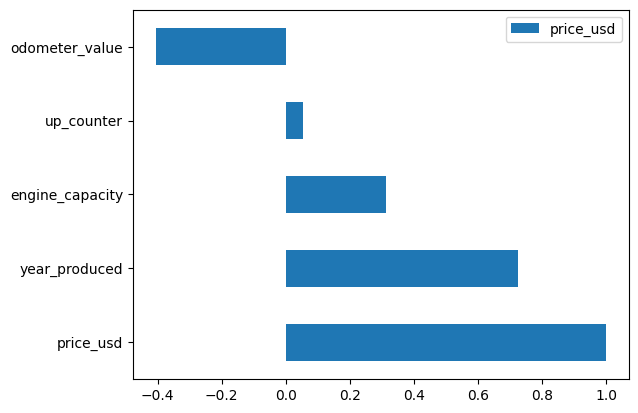

In [19]:
## Calculating Pearson's Correlation of numerical features (int and float)
Train_int_float_features = ['odometer_value', 'year_produced', 'engine_capacity', 'price_usd', 'up_counter']
Train_int_float = df_train[Train_int_float_features]

Train_corr = Train_int_float.corr(method='pearson')

## Plotting bar graph of numerical features' correlation
# Converts to DataFrame to show label in graph
pd.DataFrame(Train_corr['price_usd'].sort_values(ascending=False)).plot.barh(y='price_usd') # Correlation referred to the target variable

print(pd.DataFrame(Train_corr['price_usd'].sort_values(ascending=False)))

#### **3.1 (c)**

                 log_price_usd
log_price_usd         1.000000
year_produced         0.821932
engine_capacity       0.295848
up_counter            0.050819
odometer_value       -0.362826


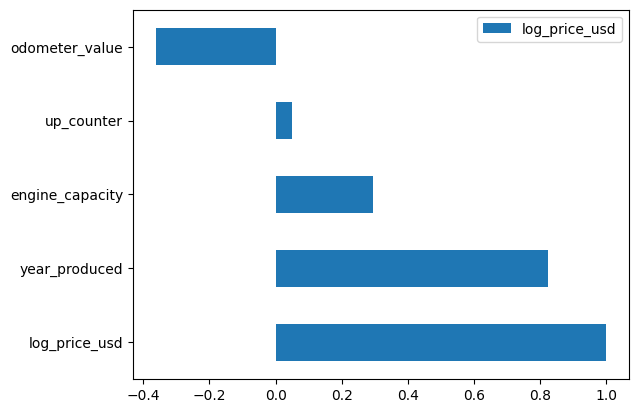

In [20]:
## Now calculating the correlation with the log of price_usd
Train_corr_log = Train_int_float.copy(deep=True) ##deepcopy
Train_corr_log['log_price_usd'] = np.log10(Train_int_float['price_usd'])
Train_corr_log.drop('price_usd', axis=1, inplace=True)
Train_corr_log = Train_corr_log.corr()
pd.DataFrame(Train_corr_log['log_price_usd'].sort_values(ascending=False)).plot.barh(y='log_price_usd') # Correlation referred to the target variable

print(pd.DataFrame(Train_corr_log['log_price_usd'].sort_values(ascending=False)))

#### **3.1 (c) - Commentaries about the correlation plots:**
* Looking at the first plot we're able to say that the year_produced is the most correlated feature with the target variable (which is logical due to the more recent the car is, the higher its price will be), followed by the feature odometer_value with a negative correlation, which makes sense given that the more the car is driven, the lower will be the price. The 3rd and 4th places are for the features engine_capacity and up_counter, respectively.

* On the other hand, when we perform the correlation related to the log of the target variable, this "rank" doesn't change, only the most correlated features (year_produced positively and odometer_value negatively) are increased by 10% approximately.

#### **3.2**


 	 Boolean Columns: ['engine_has_gas', 'has_warranty', 'is_exchangeable', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'is_transmission_automatic', 'is_engine_type_diesel'] 



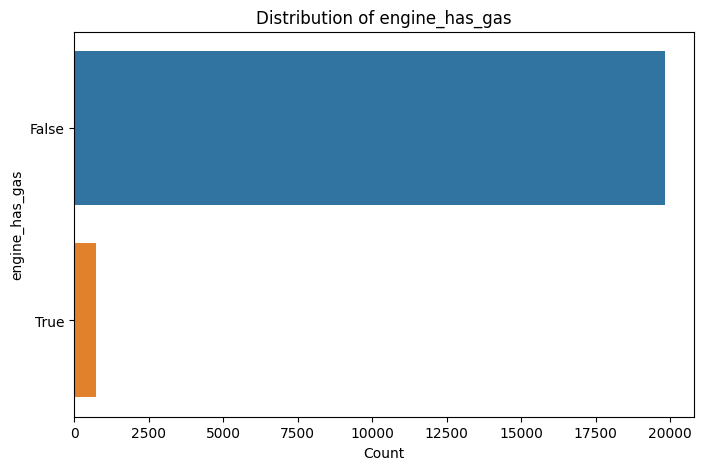

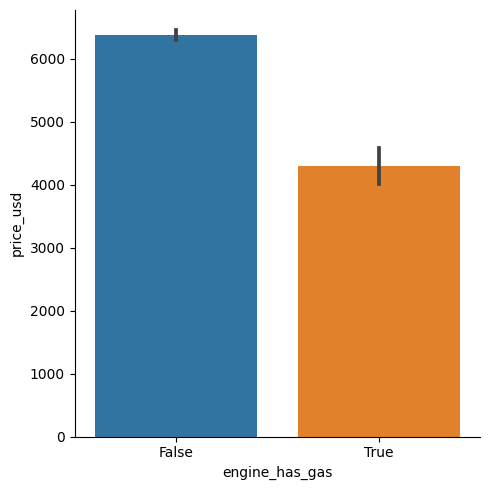

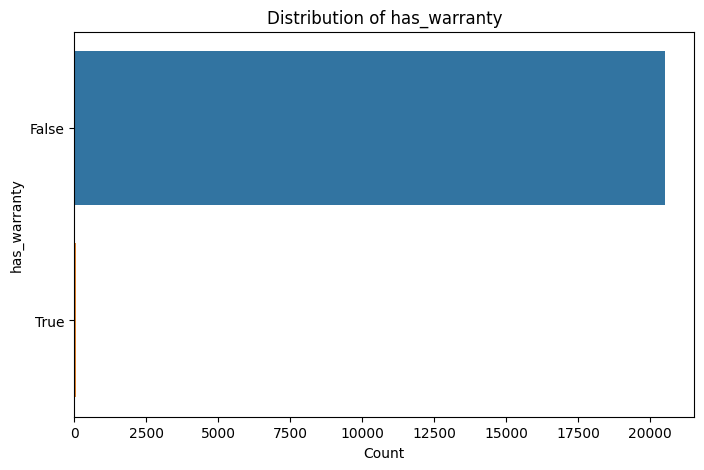

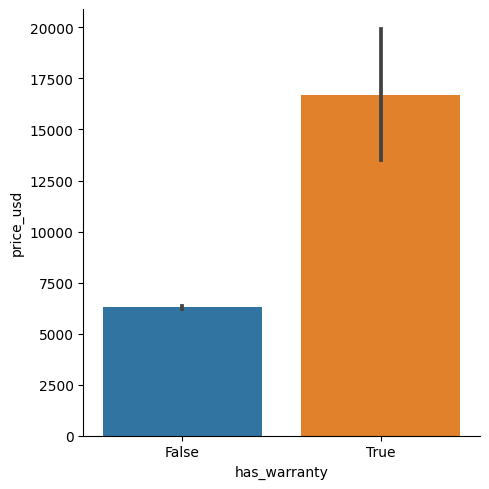

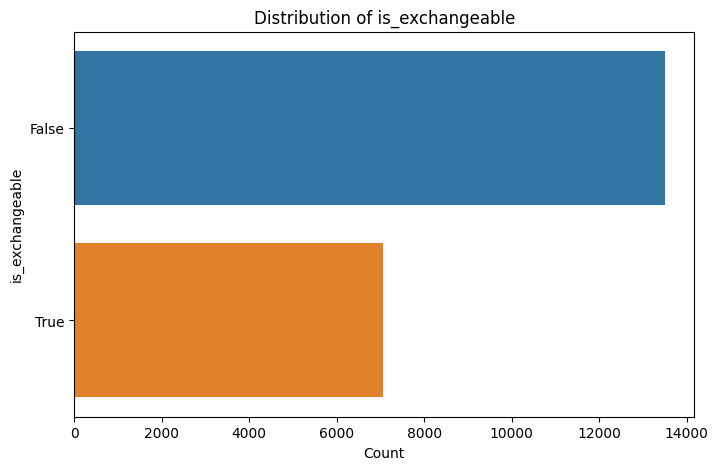

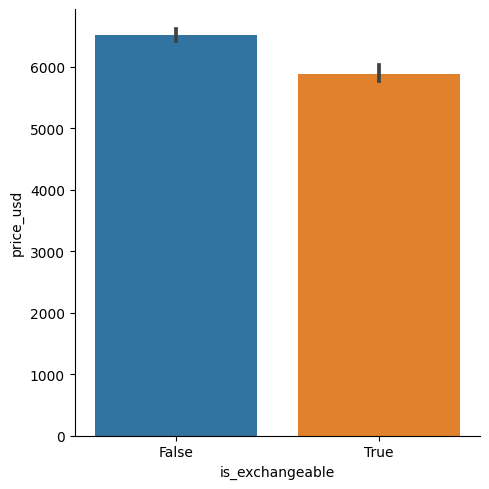

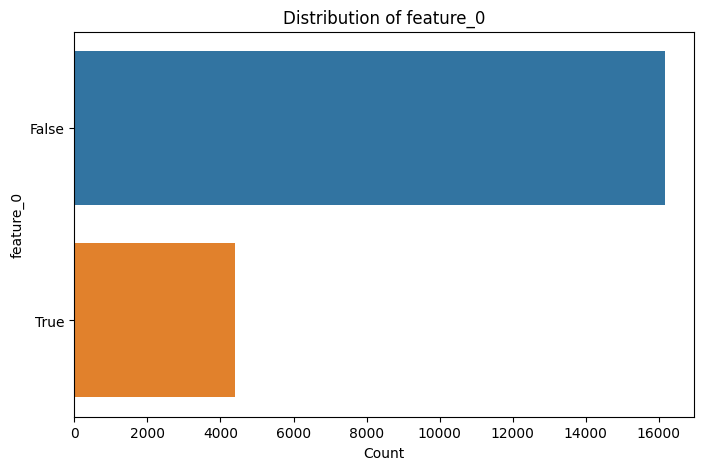

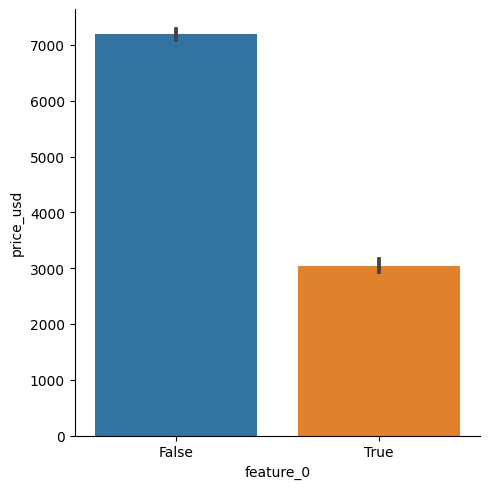

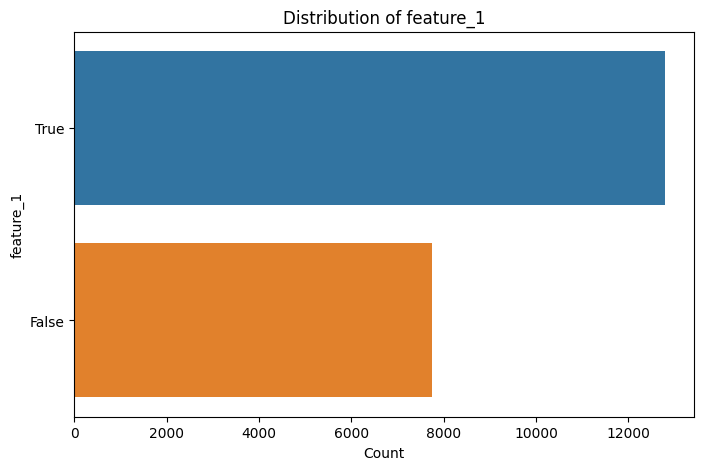

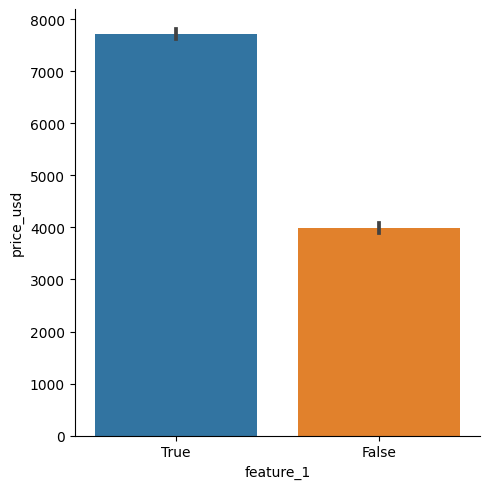

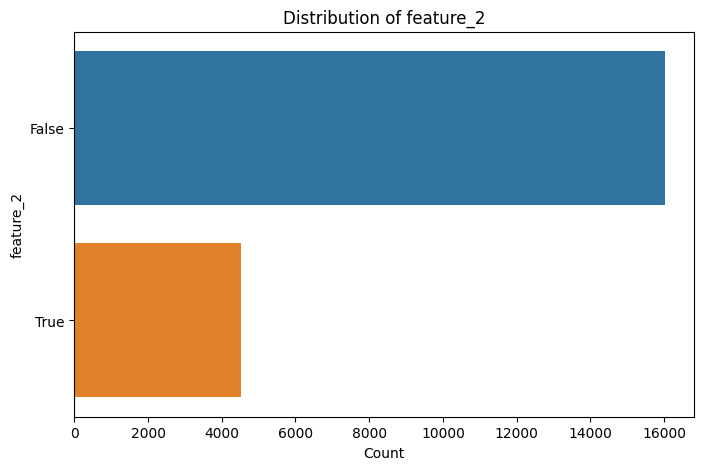

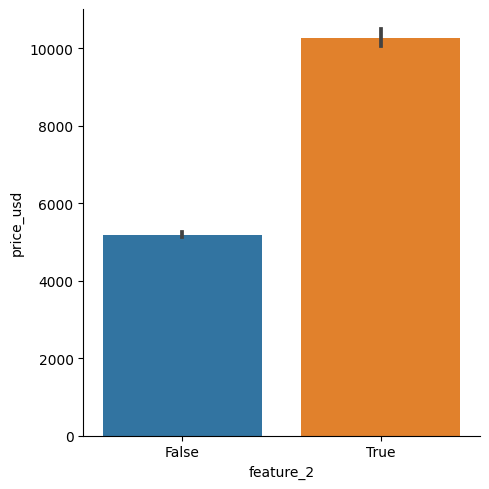

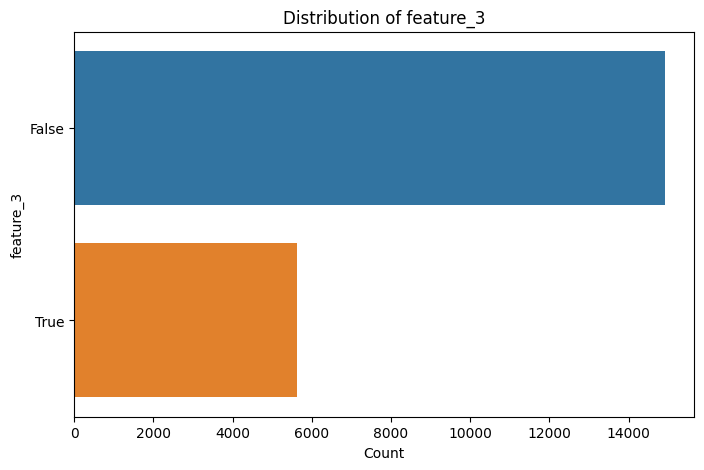

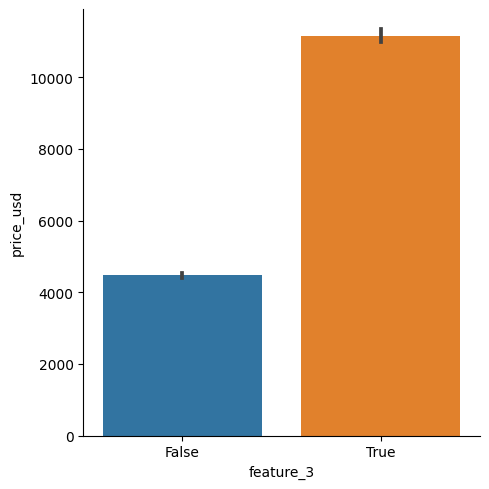

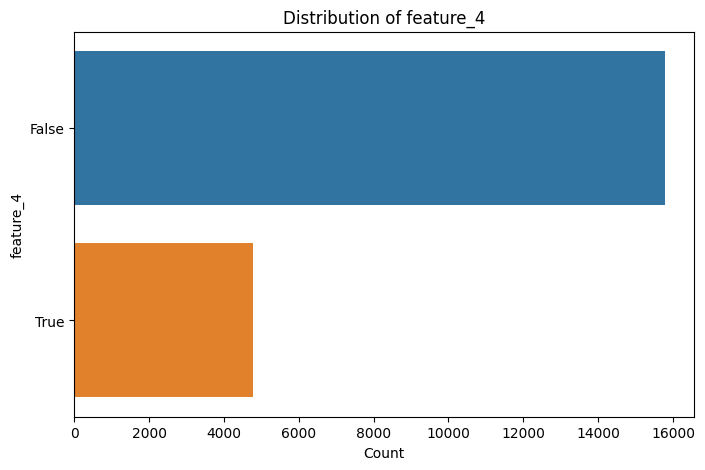

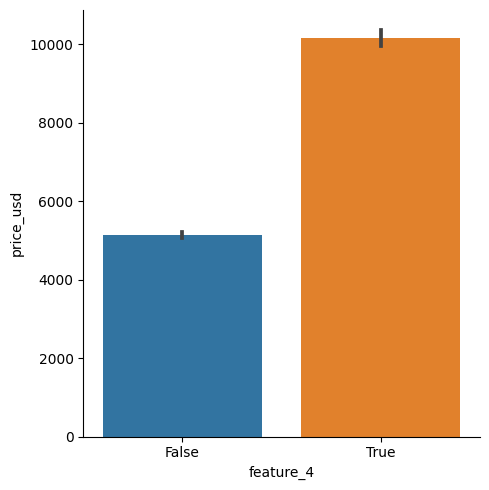

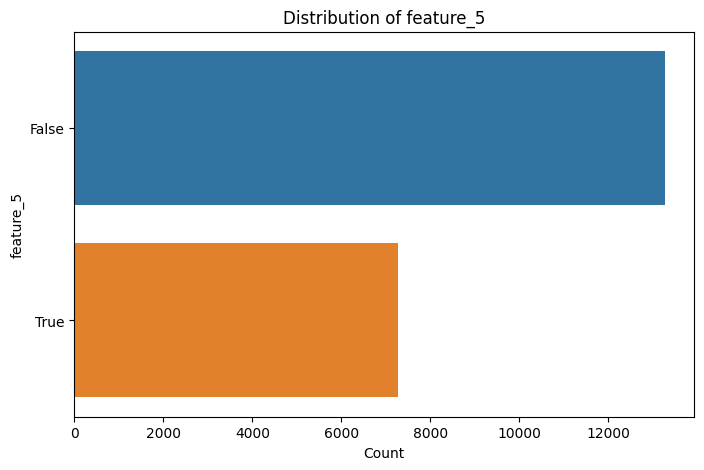

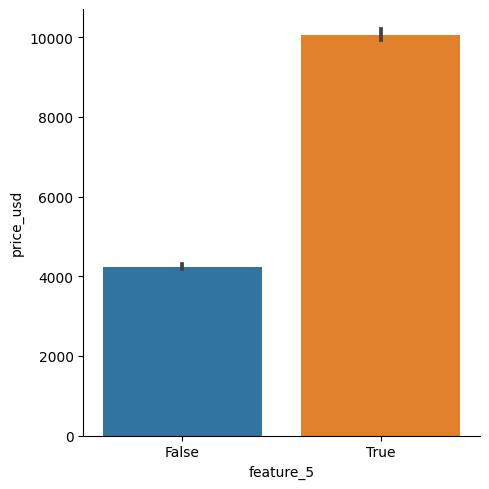

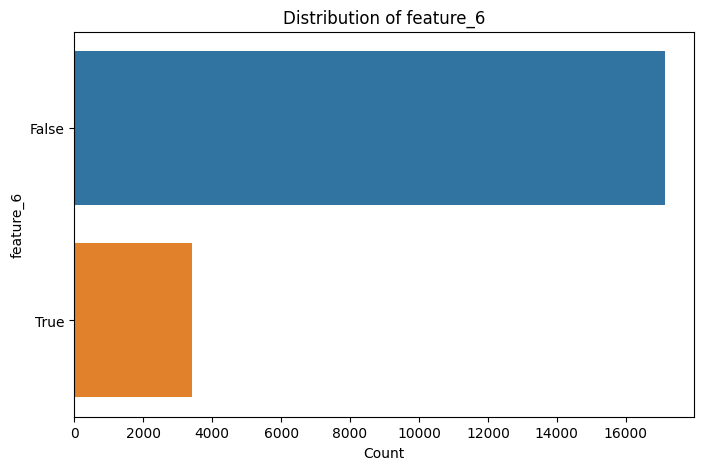

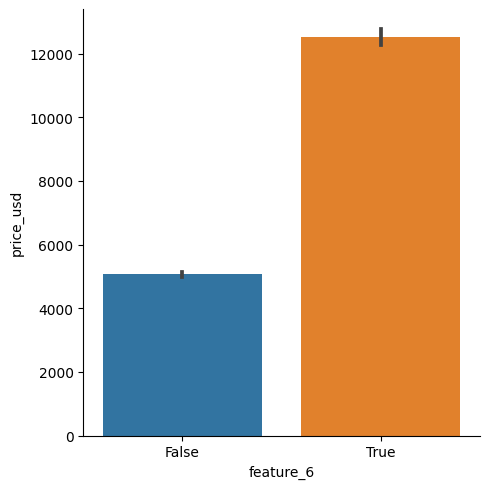

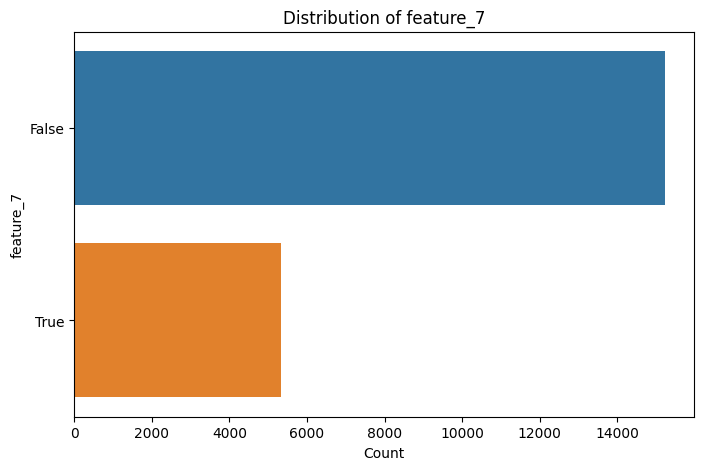

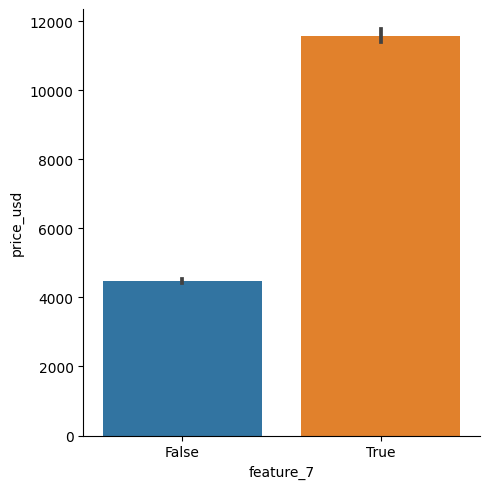

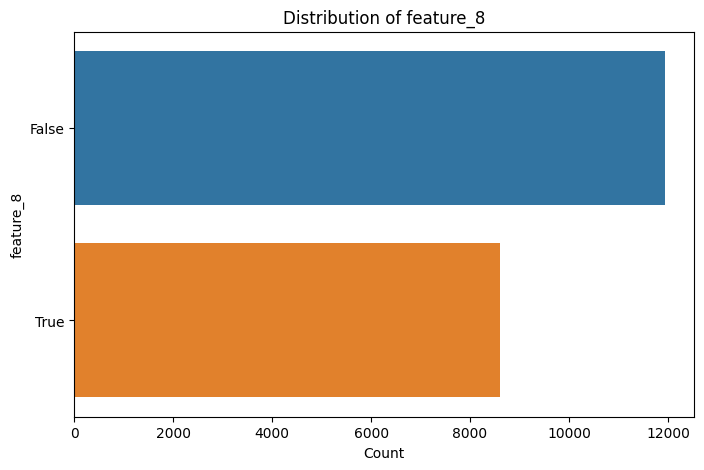

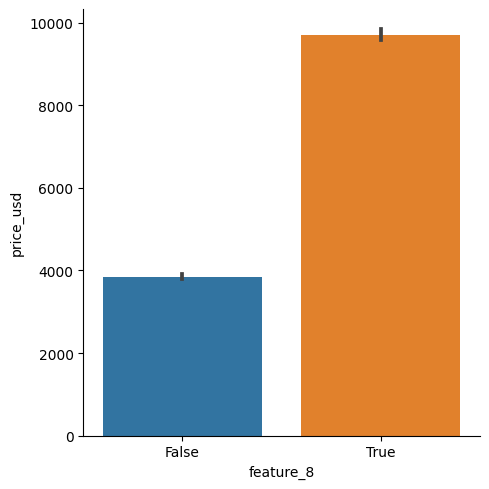

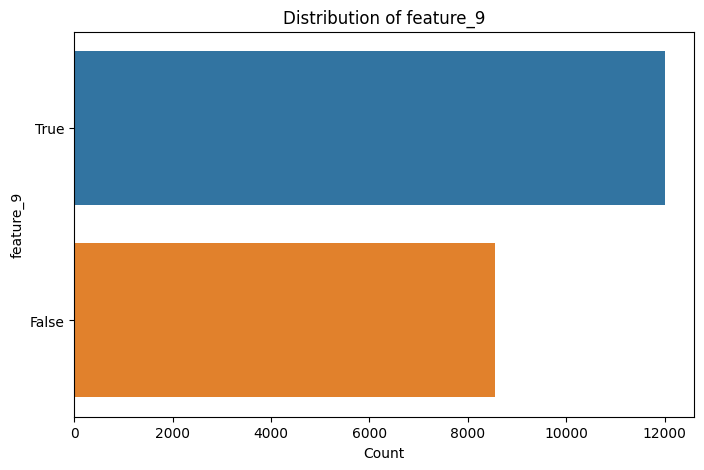

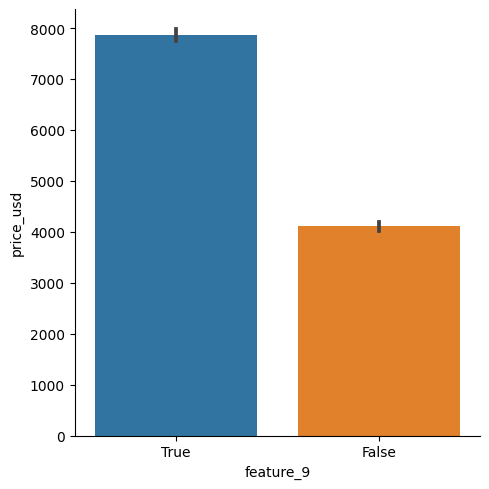

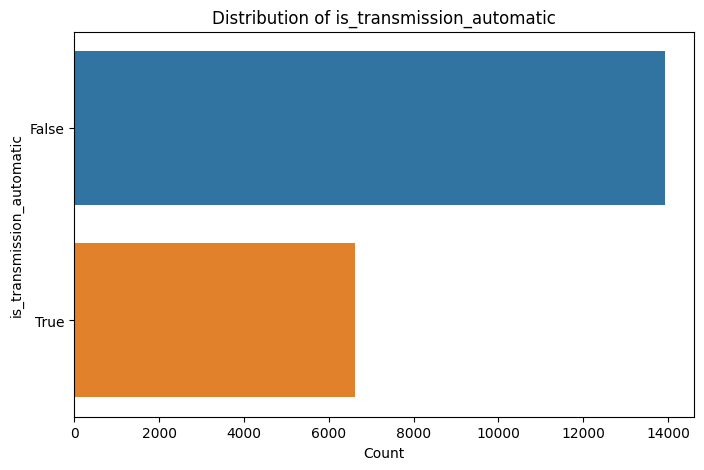

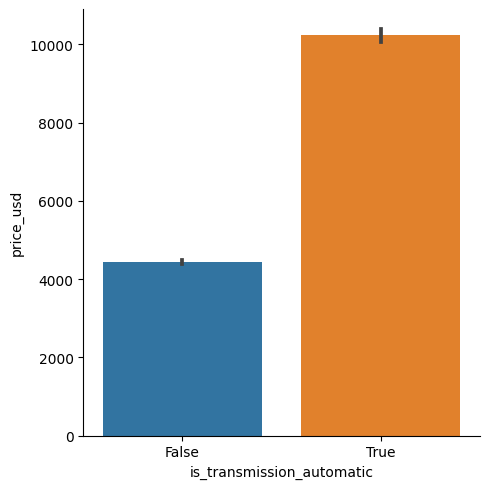

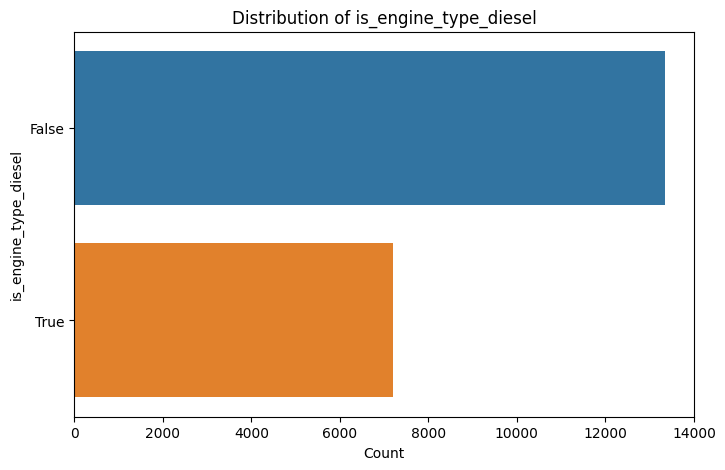

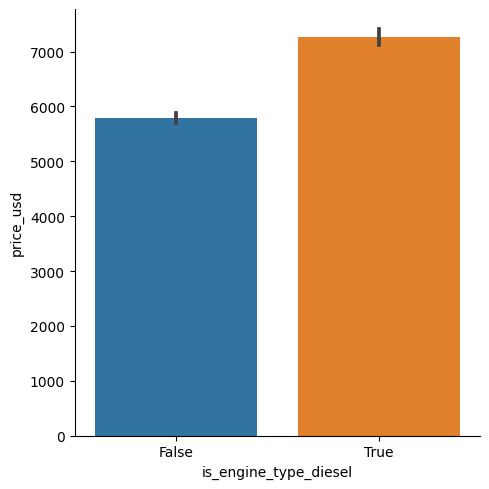

In [21]:
### Binary Variables related to the Target Variable
bool_train_columns = list(df_train.select_dtypes(bool).columns)
print(f'\n \t Boolean Columns: {bool_train_columns} \n')

for col in bool_train_columns:    
    # Plot classe's distribution
    plt.figure(figsize=(8, 5))
    sns.countplot(y=col, data=df_train, order=df_train[col].value_counts().iloc[:].index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()
    
    # Plot correlation of each Boolean Variable to the Target Variable
    sns.catplot(data = df_train,y='price_usd', x=col, kind='bar', order=df_train[col].value_counts().iloc[:].index)


#### **3.3**


 	 Categorical Columns: ['manufacturer_name', 'model_name', 'color', 'engine_fuel', 'body_type', 'drivetrain', 'location_region'] 



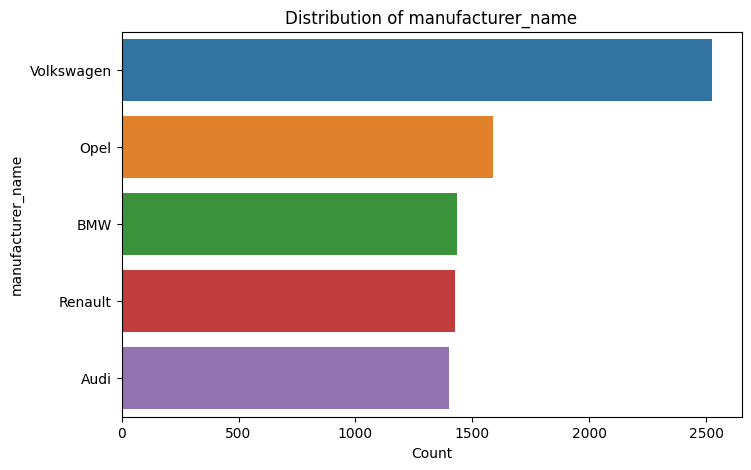

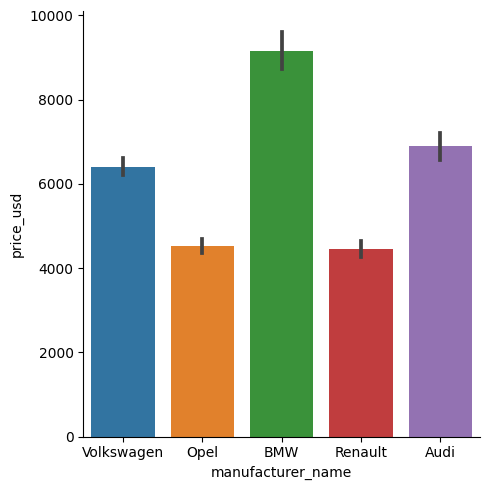

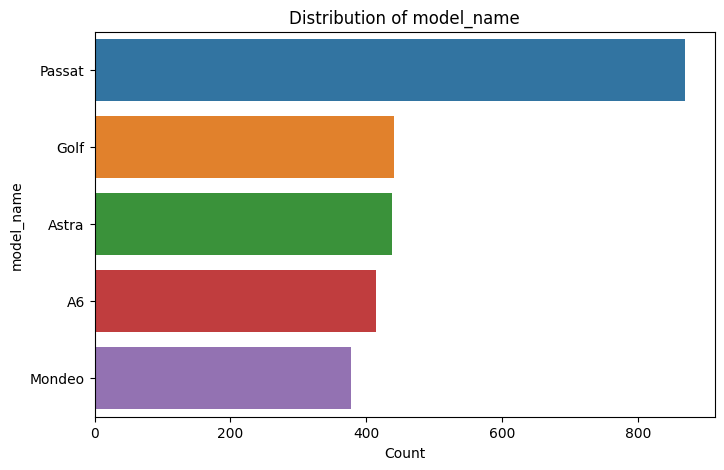

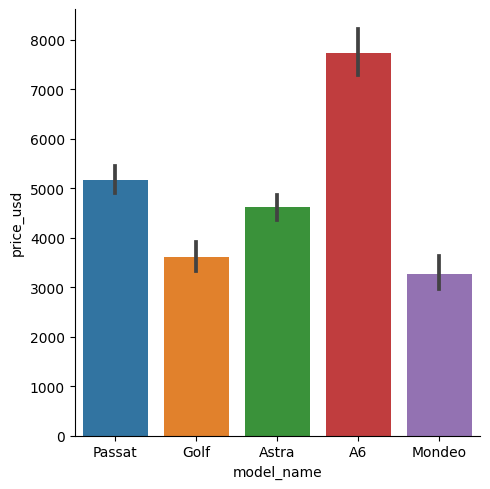

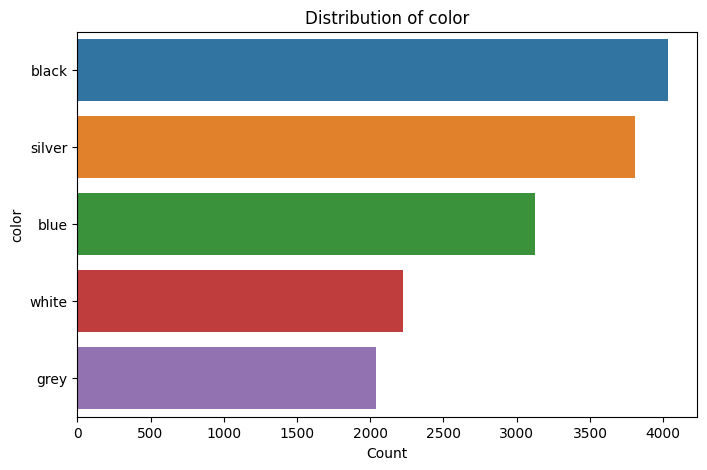

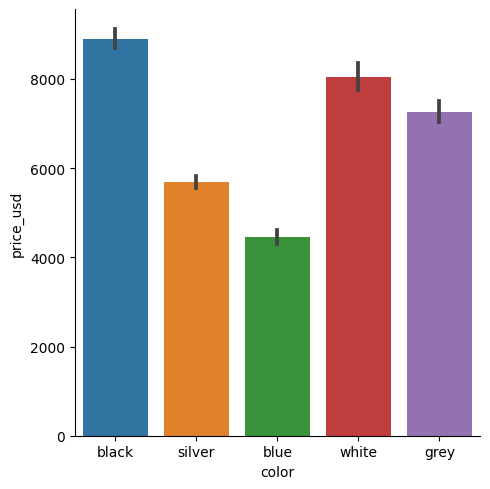

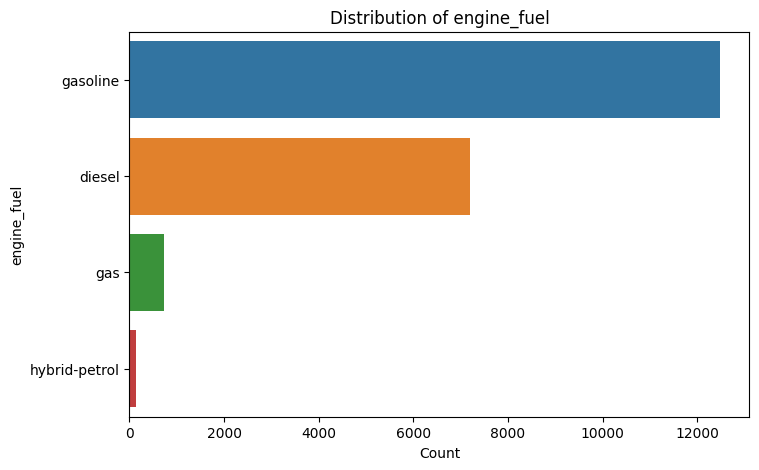

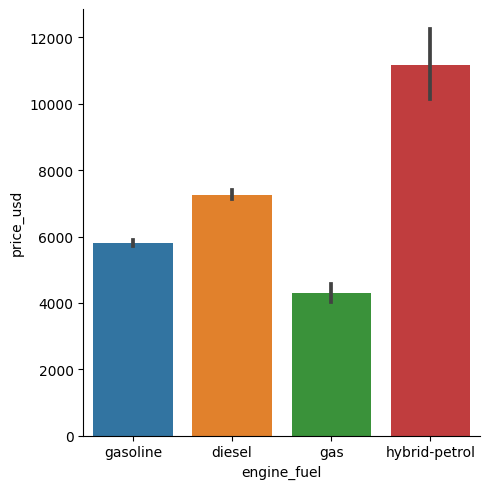

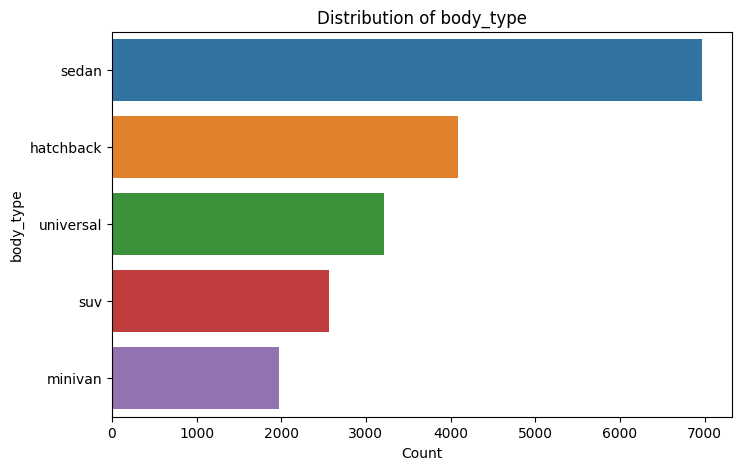

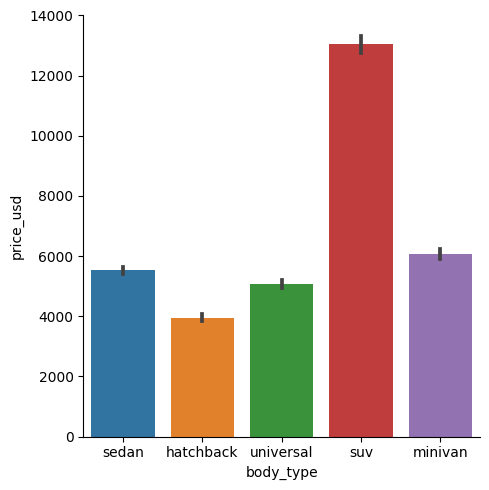

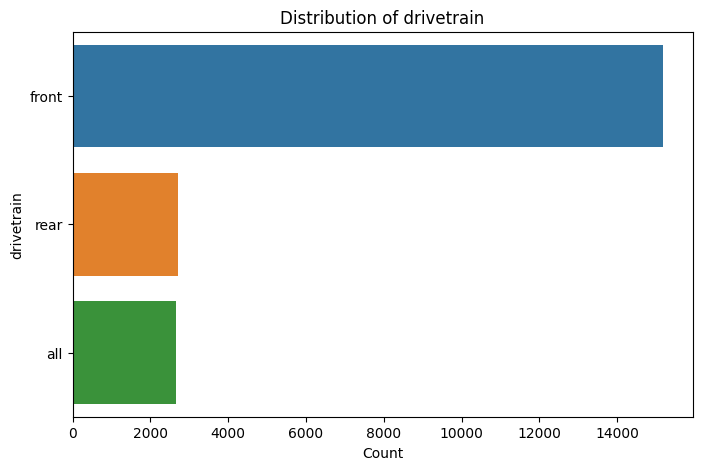

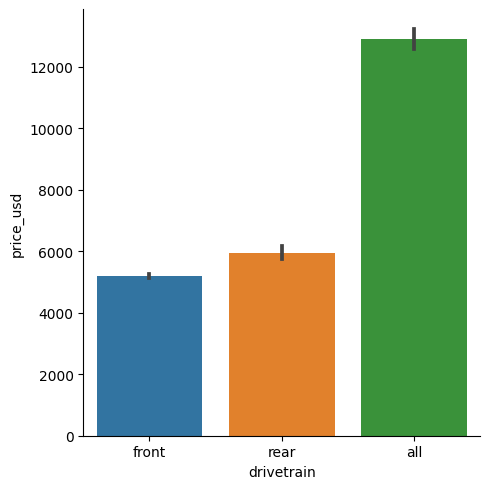

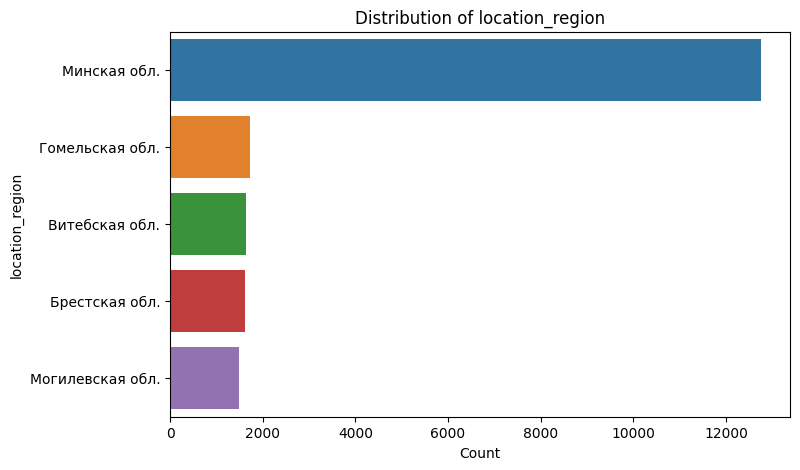

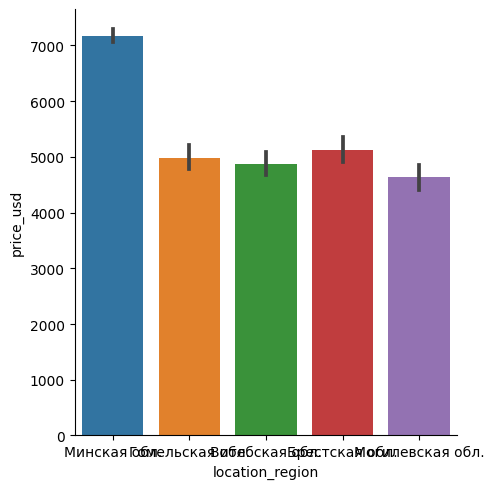

In [22]:
### Plotting the distribution of each Categorical Variable
## select categorical values
cat_cols = list(df_train.select_dtypes(include='object').columns)
print(f'\n \t Categorical Columns: {cat_cols} \n')
max_classes = 5 ## Limits to max 5 most frequent classes

for col in cat_cols:    
    # Plot classe's distribution
    plt.figure(figsize=(8, 5))
    sns.countplot(y=col, data=df_train, order=df_train[col].value_counts().iloc[:max_classes].index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()
    
    # Plot correlation of each Categorical Variable to the Target Variable
    sns.catplot(data= df_train,y='price_usd', x=col, kind='bar', order=df_train[col].value_counts().iloc[:max_classes].index)

## **4 - Hyperparameter Selection**

In [23]:
## Importing models, metrics and pre-processing tools of Scikit-learning library
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error ## MSE (kaggle doesn't allow to import RMSE) and MAPE
from sklearn.linear_model import LinearRegression ## LinReg without regularization
from sklearn.linear_model import Ridge ## LinReg with L2 regularization 
from sklearn.preprocessing import StandardScaler ## Z-score normalization
from sklearn.preprocessing import OneHotEncoder ## 1-hot encoder for categorical features
from sklearn.preprocessing import PolynomialFeatures ## Polynomial feature's transformation
from sklearn.compose import TransformedTargetRegressor ## Transforms target variable
from sklearn.compose import make_column_transformer, ColumnTransformer, make_column_selector ## Transformations over columns of dataframe and data selection
from sklearn.base import BaseEstimator, TransformerMixin ## To create different transformers (useful to put created class in make_pipeline)
from sklearn.pipeline import Pipeline ## Sequence of multiple transformationns
from sklearn.pipeline import make_pipeline ## Create pipeline with multiple steps


## RMSE function definition:
root_mean_squared_error = lambda a, b: np.sqrt(np.mean((a - b)**2))

#### **4.1 (a)**

In [24]:
## Pipeline for training with only numerical data without normalization

## Defining vector with only columns' names of numerical features
num_feat_col = list(X_train.select_dtypes(include=['number']).columns)

## create preprocessor that selects only num features columns
class Num_col_selector(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None): ## y=None ignores target data
        return self
    
    def transform(self, X):
        X_num_col = X[num_feat_col]
        return X_num_col


## create pipeline
Lin_Reg_standard_num = make_pipeline(Num_col_selector(), LinearRegression())


# Training
Lin_Reg_standard_num.fit(X_train, y_train)

# See its performance
print(f'Train RMSE: {root_mean_squared_error(y_train, Lin_Reg_standard_num.predict(X_train)):.2f}')
print(f'Train MAPE: {mean_absolute_percentage_error(y_train, Lin_Reg_standard_num.predict(X_train)):.1%}')

print(f'Validation RMSE: {root_mean_squared_error(y_val, Lin_Reg_standard_num.predict(X_val)):.2f}')
print(f'Validation MAPE: {mean_absolute_percentage_error(y_val, Lin_Reg_standard_num.predict(X_val)):.1%}')

Train RMSE: 3461.84
Train MAPE: 77.1%
Validation RMSE: 3397.54
Validation MAPE: 77.9%


#### **4.1 (b)**

In [25]:
## Pipeline for training with only numerical data with z-score normalization

pipeline_w_normalization = make_pipeline( Num_col_selector(), StandardScaler(), LinearRegression())
pipeline_w_normalization.fit(X_train, y_train)

# See its performance
print(f'Train RMSE: {np.sqrt(mean_squared_error(y_train, pipeline_w_normalization.predict(X_train))):.2f}')
print(f'Train MAPE: {mean_absolute_percentage_error(y_train, pipeline_w_normalization.predict(X_train)):.1%}')

print(f'Validation RMSE: {np.sqrt(mean_squared_error(y_val, pipeline_w_normalization.predict(X_val))):.2f}')
print(f'Validation MAPE: {mean_absolute_percentage_error(y_val, pipeline_w_normalization.predict(X_val)):.1%}')

Train RMSE: 3461.84
Train MAPE: 77.1%
Validation RMSE: 3397.54
Validation MAPE: 77.9%


#### **4.1 (b) - Comments of LinReg results:**
* The results with and without the normalization still the same. The reason for that is probably this: using only the numerical features may not give enough information for the model learn the complexity of the problem/data, even if the problem is now "well conditioned" due to use of z-score normalization.

In [26]:
## Seeing its coefficients
print(f'Standard LinReg parameters: {Lin_Reg_standard_num[-1].coef_}')
print(f'LinReg parameters with z-score: {pipeline_w_normalization[-1].coef_}')

Standard LinReg parameters: [-5.74253478e-03  4.92023711e+02  3.13406923e+03  2.75320200e+00]
LinReg parameters with z-score: [-697.52089727 3780.10789805 1888.19622701  117.87925718]


#### **4.2**

In [27]:
## Pipeline for training only using Boolean features

## Defining vector with only columns' names of boolean features
bool_feat_col = list(X_train.select_dtypes(include=['bool']).columns)

## create preprocessor that selects only boolean features columns
class Bool_col_selector(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_num_col = X[bool_feat_col]
        return X_num_col

## create pipeline
Lin_Reg_bool = make_pipeline(Bool_col_selector(), LinearRegression())

# Training
Lin_Reg_bool.fit(X_train, y_train)

# See its performance
print(f'Train RMSE: {root_mean_squared_error(y_train, Lin_Reg_bool.predict(X_train)):.2f}')
print(f'Train MAPE: {mean_absolute_percentage_error(y_train, Lin_Reg_bool.predict(X_train)):.1%}')

print(f'Validation RMSE: {root_mean_squared_error(y_val, Lin_Reg_bool.predict(X_val)):.2f}')
print(f'Validation MAPE: {mean_absolute_percentage_error(y_val, Lin_Reg_bool.predict(X_val)):.1%}')

Train RMSE: 4074.97
Train MAPE: 81.1%
Validation RMSE: 4095.09
Validation MAPE: 82.9%


#### **4.3**

In [28]:
## Pipeline for training using only Categorical features

## Defining vector with only columns' names of categorical features
cat_feat_col = list(X_train.select_dtypes(include=['object']).columns)

## create preprocessor that selects only boolean features columns
class Cat_col_selector(BaseEstimator, TransformerMixin):
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X_num_col = X[cat_feat_col]
        return X_num_col


## preprocessor for use 1-hot encoder only in categorical features
preprocessor_cat = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ## prevent errors if your test dataset contains values for a column that were not present in your training dataset
         cat_feat_col)
    ],
    remainder='passthrough')

# Creates the pipeline with all stages
pipeline_cat = make_pipeline(Cat_col_selector(), preprocessor_cat, LinearRegression())


## Train in the cat features dataframe
pipeline_cat.fit(X_train, y_train)


# See its performance
print(f'Train RMSE: {root_mean_squared_error(y_train, pipeline_cat.predict(X_train)):.2f}')
print(f'Train MAPE: {mean_absolute_percentage_error(y_train, pipeline_cat.predict(X_train)):.1%}')

print(f'Validation RMSE: {root_mean_squared_error(y_val, pipeline_cat.predict(X_val)):.2f}')
print(f'Validation MAPE: {mean_absolute_percentage_error(y_val, pipeline_cat.predict(X_val)):.1%}')

Train RMSE: 3694.76
Train MAPE: 73.6%
Validation RMSE: 3722.90
Validation MAPE: 75.0%


#### **4.4**

In [29]:
### Pipeline for training using all atributes

## Creates the pipeline containing every stage
model_w_all_feat = make_pipeline(preprocessor_cat, LinearRegression())
model_w_all_feat.fit(X_train, y_train)


# See its performance
print(f'Train RMSE: {root_mean_squared_error(y_train, model_w_all_feat.predict(X_train)):.2f}')
print(f'Train MAPE: {mean_absolute_percentage_error(y_train, model_w_all_feat.predict(X_train)):.1%}')

print(f'Validation RMSE: {root_mean_squared_error(y_val, model_w_all_feat.predict(X_val)):.2f}')
print(f'Validation MAPE: {mean_absolute_percentage_error(y_val, model_w_all_feat.predict(X_val)):.1%}')

Train RMSE: 3101.81
Train MAPE: 64.4%
Validation RMSE: 3084.88
Validation MAPE: 64.5%


#### **4.5 (a)**

In [30]:
## Pipeline for training using Polynomial Features

#define vector with all degree for polyfeat
pol_degree = [2,3,5,7,10,15]

# define empty dictionary to store all models
models_PF = {}

## iterates over diff degrees
for degree in pol_degree:
    
    poly_scaler = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=degree,include_bias=False)),
    ('scaler', StandardScaler())
    ])
    
    preprocessor = ColumnTransformer(
    transformers=[
        ('num', poly_scaler, num_feat_col), ## apply only in numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_feat_col), ## only categorical ones
        ('bool', 'passthrough', bool_feat_col) ## ignore boolean features
    ])
    
    full_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ## creates pipeline
                           ('regressor', LinearRegression())])
    
    model_name = f'PolyDg-{degree}' ## for better visualization :)
    
    ## stores model in the dictionary
    models_PF[model_name] = full_pipeline
    

### stores results
results_poly = pd.DataFrame([], columns=['Train RMSE', 'Train MAPE', 'Val RMSE', 'Val MAPE'])

###train and test on validation dataset
for name, model in models_PF.items():
    for (X, y, subset) in [(X_train, y_train, 'Train'), (X_val, y_val, 'Val')]:
        if subset == 'Train':
            model.fit(X, y)
        for (metric, abbrev) in [(root_mean_squared_error, 'RMSE'), (mean_absolute_percentage_error, 'MAPE')]:
            results_poly.loc[name, f'{subset} {abbrev}'] = metric(y, model.predict(X))
            
## table of results
results_poly.style.format({'Train RMSE': '{:.2f}', 'Train MAPE': '{:.1%}',
                       'Val RMSE': '{:.2f}',  'Val MAPE': '{:.1%}'})   

,Train RMSE,Train MAPE,Val RMSE,Val MAPE
PolyDg-2,1893.71,34.1%,1883.36,35.8%
PolyDg-3,1831.60,33.6%,1824.78,35.2%
PolyDg-5,1804.78,32.3%,1792.42,33.6%
PolyDg-7,1598.87,27.6%,548298.33,366.2%
PolyDg-10,1526.77,27.4%,275392742.43,169457.3%
PolyDg-15,1477.85,30.2%,83533084381.79,51274834.3%


#### **4.5 (a) - Comments of LinReg with Polynomial Features results:**
* By looking at the metrics of each model, for training and validation sets, it appears that increasing the degree D of polynomial features also increases its performance, until it doesn't. If D is too large, the model start to overfit the training data and does worse on the validation set.

#### **4.5 (b)**

In [31]:
## Polynomial features with Ridge model (L2 Regularization)

#storing the models
models_PF_and_Ridge = {}

# parameters tested
pol_degree = [2,5,10]
alphas_ridge = [0.1,0.5,1,100]

## iterates over parameters to create each model
for degree in pol_degree:
    for alpha in alphas_ridge:
        
        poly_scaler = Pipeline(steps=[
            ('poly', PolynomialFeatures(degree=degree,include_bias=False)),
            ('scaler', StandardScaler())
        ])

        preprocessor = ColumnTransformer(
                        transformers=[
                        ('num', poly_scaler, num_feat_col), ## apply only in numerical features
                        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_feat_col), ## only categorical ones
                        ('bool', 'passthrough', bool_feat_col) ## ignore boolean features
                        ])

        
        full_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('regressor', Ridge(alpha=alpha))])

        model_name = f'Poly{degree}-Ridge{alpha}' ## for better visualization :)
    
        ## stores model in the dictionary
        models_PF_and_Ridge[model_name] = full_pipeline



### stores results
results_ridge = pd.DataFrame([], columns=['Train RMSE', 'Train MAPE', 'Val RMSE', 'Val MAPE'])

###train and test on validation dataset
for name, model in models_PF_and_Ridge.items():
    for (X, y, subset) in [(X_train, y_train, 'Train'), (X_val, y_val, 'Val')]:
        if subset == 'Train':
            model.fit(X, y)
        for (metric, abbrev) in [(root_mean_squared_error, 'RMSE'), (mean_absolute_percentage_error, 'MAPE')]:
            results_ridge.loc[name, f'{subset} {abbrev}'] = metric(y, model.predict(X))
            
## table of results
results_ridge.style.format({'Train RMSE': '{:.2f}', 'Train MAPE': '{:.1%}',
                       'Val RMSE': '{:.2f}',  'Val MAPE': '{:.1%}'})

,Train RMSE,Train MAPE,Val RMSE,Val MAPE
Poly2-Ridge0.1,2094.33,40.5%,2089.36,41.2%
Poly2-Ridge0.5,2227.68,46.1%,2229.90,46.7%
Poly2-Ridge1,2259.91,47.3%,2265.02,47.8%
Poly2-Ridge100,2560.13,51.4%,2567.52,52.4%
Poly5-Ridge0.1,1828.27,32.6%,1811.54,33.2%
Poly5-Ridge0.5,1908.09,34.4%,1897.20,35.3%
Poly5-Ridge1,1972.74,36.6%,1964.62,37.3%
Poly5-Ridge100,2512.84,50.3%,2539.40,52.1%
Poly10-Ridge0.1,1782.19,31.6%,1843.36,33.9%
Poly10-Ridge0.5,1798.85,31.6%,1799.17,33.0%


#### **4.5 (b) - Comments on Ridge models' results:**
* The results show that the regularization hyperparameter increases the performance of the models that has high values for D (degree of PolynomialFeatures hyperparameter) as its values also increase but, analyzing the metrics for models with lower values of D (D<=5), it actually hurt their performances, due to pinch down the weights of the transformed features, so, in this case, the lower the value for alpha, the better.

#### **4.6**

In [32]:
## Training using all features and TransformTargetRegressor

## Creates the pipeline containing every stage
model_w_all_feat_TTR = make_pipeline(preprocessor_cat, TransformedTargetRegressor(LinearRegression(), func=np.log, inverse_func=np.exp))
model_w_all_feat_TTR.fit(X_train, y_train)


# See its performance
print(f'Train RMSE: {root_mean_squared_error(y_train, model_w_all_feat_TTR.predict(X_train)):.2f}')
print(f'Train MAPE: {mean_absolute_percentage_error(y_train, model_w_all_feat_TTR.predict(X_train)):.1%}')

print(f'Validation RMSE: {root_mean_squared_error(y_val, model_w_all_feat_TTR.predict(X_val)):.2f}')
print(f'Validation MAPE: {mean_absolute_percentage_error(y_val, model_w_all_feat_TTR.predict(X_val)):.1%}')

Train RMSE: 2391.71
Train MAPE: 33.6%
Validation RMSE: 2405.93
Validation MAPE: 33.2%


#### **4.7**

In [33]:
## Training using best PolyFeat + Ridge model and using TransformTargetRegressor
## using 'Poly5-Ridge0.1' 
#pick best model 
best_model_PolyRidge = models_PF_and_Ridge['Poly5-Ridge0.1']    

##apply TTR
best_model_PolyRidge.set_params(regressor=TransformedTargetRegressor(regressor=Ridge(alpha=0.1), func=np.log, inverse_func=np.exp))


##training
best_model_PolyRidge.fit(X_train, y_train)


# See its performance
print(f'Train RMSE: {root_mean_squared_error(y_train, best_model_PolyRidge.predict(X_train)):.2f}')
print(f'Train MAPE: {mean_absolute_percentage_error(y_train, best_model_PolyRidge.predict(X_train)):.1%}')

print(f'Validation RMSE: {root_mean_squared_error(y_val, best_model_PolyRidge.predict(X_val)):.2f}')
print(f'Validation MAPE: {mean_absolute_percentage_error(y_val, best_model_PolyRidge.predict(X_val)):.1%}')

Train RMSE: 1690.59
Train MAPE: 22.2%
Validation RMSE: 1733.03
Validation MAPE: 22.8%


In [34]:
best_model_PolyRidge

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('poly',
                                                                   PolynomialFeatures(degree=5,
                                                                                      include_bias=False)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['odometer_value',
                                                   'year_produced',
                                                   'engine_capacity',
                                                   'up_counter']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['manufacturer_name',
                                                   'model_name', 'color',
                                                   'engine_fuel', 'body_t...
                                                 ('bool', 'passthrough',
                                                  ['engine_has_gas',
                                                   'has_warranty',
                                                   'is_exchangeable',
                                                   'feature_0', 'feature_1',
                                                   'feature_2', 'feature_3',
                                                   'feature_4', 'feature_5',
                                                   'feature_6', 'feature_7',
                                                   'feature_8', 'feature_9',
                                                   'is_transmission_automatic',
                                                   'is_engine_type_diesel'])])),
                ('regressor',
                 TransformedTargetRegressor(func=<ufunc 'log'>,
                                            inverse_func=<ufunc 'exp'>,
                                            regressor=Ridge(alpha=0.1)))])

#### **4.8 - Comments on the entire Section 4:**
* Firstly, was performed a test of the influence of each type of feature inside the dataset. The results for the numerical data type were better even without the normalization (which didn't make any impact, except for the weights), but nothing compared to using all features together (which made the MAPE drop about 10%). Then with the preprocessing step of adding polynomial features, the metrics showed that adding this kind of transformation can be helpful if used wisely, increasing the performance as the degree also increased, but when the degree started to be too large, the MAPE for the validation set exploded, due to overfitting. Also, adding the L2 regularization showed that even choosing a high value for alpha, for large degrees of "PolyFeat", the model was able to drop significantly the MAPE on the validation set (approximating to 50% of MAPE), but for degrees minor or equal to 5, it decreased its performance, being better used if its value is tiny. After all that, finally, the *TransformTargetRegressor* (TTR) was used, which makes an approximation of the loss function to the MAPE metric used on the model evaluation for this application. With this, the results for the MAPE got better in comparison with the model using only LinearRegression with 1-hot encoding (see section 4.4), and, picking the best model using PolyFeat + Ridge and applying the TTR gave the best result, decreasing about 10.9% (on the average) on both training and validation sets in comparison with the model that used only PolyFeat + Ridge.

## **5 - Retraining and results in the Test set**

In [35]:
## No need for splitting again the DF, already have df_train_val from Section 2

#Creating X_train_val and y_train_val
X_train_val, y_train_val = pd.concat([X_train, X_val]), pd.concat([y_train, y_val])

##Check shapes
print(X_train.shape)
print(X_val.shape)
print(X_train_val.shape)

(20547, 26)
(6850, 26)
(27397, 26)


#### **5.1**

In [36]:
## LinReg with all features
## Training
model_w_all_feat.fit(X_train_val, y_train_val)

## Performance
print(f'Train_Val RMSE: {root_mean_squared_error(y_train_val, model_w_all_feat.predict(X_train_val)):.2f}')
print(f'Train_Val MAPE: {mean_absolute_percentage_error(y_train_val, model_w_all_feat.predict(X_train_val)):.1%}')

print(f'Test RMSE: {root_mean_squared_error(y_test, model_w_all_feat.predict(X_test)):.2f}')
print(f'Test MAPE: {mean_absolute_percentage_error(y_test, model_w_all_feat.predict(X_test)):.1%}')

Train_Val RMSE: 3097.97
Train_Val MAPE: 64.0%
Test RMSE: 3129.77
Test MAPE: 64.6%


#### **5.2**

In [37]:
## Polynomial Regression with all features

Best_Poly_LR = models_PF['PolyDg-5']

## training on train_val dataset
Best_Poly_LR.fit(X_train_val, y_train_val)


## Performance
print(f'Train_Val RMSE: {root_mean_squared_error(y_train_val, Best_Poly_LR.predict(X_train_val)):.2f}')
print(f'Train_Val MAPE: {mean_absolute_percentage_error(y_train_val, Best_Poly_LR.predict(X_train_val)):.1%}')

print(f'Test RMSE: {root_mean_squared_error(y_test, Best_Poly_LR.predict(X_test)):.2f}')
print(f'Test MAPE: {mean_absolute_percentage_error(y_test, Best_Poly_LR.predict(X_test)):.1%}')


Train_Val RMSE: 1792.37
Train_Val MAPE: 32.1%
Test RMSE: 3134.37
Test MAPE: 33.7%


#### **5.3**

In [38]:
## TransformTargetRegressor model

#training on train_val dataset
model_w_all_feat_TTR.fit(X_train_val, y_train_val)

## Performance
print(f'Train_Val RMSE: {root_mean_squared_error(y_train_val, model_w_all_feat_TTR.predict(X_train_val)):.2f}')
print(f'Train_Val MAPE: {mean_absolute_percentage_error(y_train_val, model_w_all_feat_TTR.predict(X_train_val)):.1%}')

print(f'Test RMSE: {root_mean_squared_error(y_test, model_w_all_feat_TTR.predict(X_test)):.2f}')
print(f'Test MAPE: {mean_absolute_percentage_error(y_test, model_w_all_feat_TTR.predict(X_test)):.1%}')


Train_Val RMSE: 2398.32
Train_Val MAPE: 33.6%
Test RMSE: 2379.82
Test MAPE: 33.3%


#### **5.4**

In [39]:
## TTR+Poly(+Ridge)

#training on train_val dataset
best_model_PolyRidge.fit(X_train_val, y_train_val)

## Performance
print(f'Train_Val RMSE: {root_mean_squared_error(y_train_val, best_model_PolyRidge.predict(X_train_val)):.2f}')
print(f'Train_Val MAPE: {mean_absolute_percentage_error(y_train_val, best_model_PolyRidge.predict(X_train_val)):.1%}')

print(f'Test RMSE: {root_mean_squared_error(y_test, best_model_PolyRidge.predict(X_test)):.2f}')
print(f'Test MAPE: {mean_absolute_percentage_error(y_test, best_model_PolyRidge.predict(X_test)):.1%}')

Train_Val RMSE: 1678.82
Train_Val MAPE: 22.2%
Test RMSE: 1665.03
Test MAPE: 22.9%


## **6 - Results Analysis**

#### **6.1**

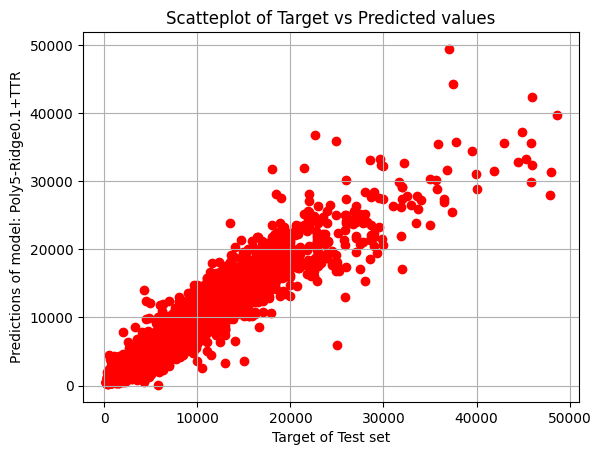

In [40]:
### Scatterplot of the Target Values and Predictions
plt.Figure()
plt.scatter(y_test, best_model_PolyRidge.predict(X_test), c='red')
plt.xlabel('Target of Test set')
plt.ylabel('Predictions of model: Poly5-Ridge0.1+TTR')
plt.title('Scatteplot of Target vs Predicted values')
plt.grid()
plt.show()

#### **6.2**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


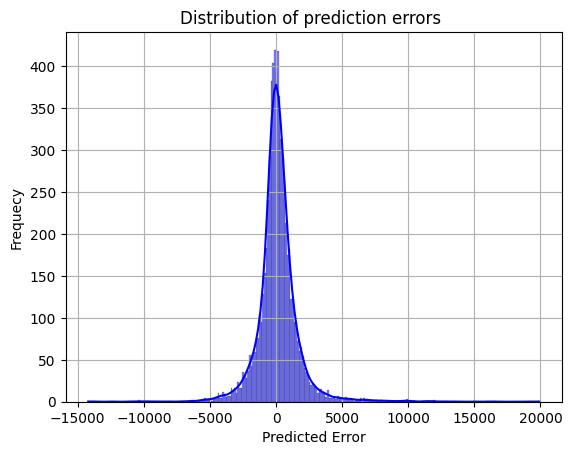

In [41]:
### Error distribution
## calculating the error
error_dist = y_test - best_model_PolyRidge.predict(X_test)

plt.figure()
sns.histplot(error_dist, kde=True, color='blue', bins='auto')
plt.xlabel('Predicted Error')
plt.ylabel('Frequecy')
plt.title('Distribution of prediction errors ')
plt.grid(True)
plt.show()

#### **6.3 - Conclusions over analysis:**
* Using the TTR preprocessing technique showed good results that distinguish even more when compared to other models that were tested in this notebook. The main goal is to reduce the MAPE value and the best result achieved here was a MAPE of 22.2% on the training/validation set and 22.9% on the test set, which is quite good (again, in comparison with the other models tested here). With all that said, if we consider the RMSE as an evaluation metric, this conclusion would be different. Even if selecting the best model for the RMSE (which in this case was the same), the value for the RMSE on both sets is still pretty high if a comparison is made with other applications where this metric is the evaluation metric (generally a RMSE is between 0 and 1 for being considerable good for most of the Linear Regression problems).

## **7 - Conclusion**

#### **7.1**

* Doing this notebook helped me learn a lot about the main used libraries (such as Pandas, Seaborn, and Scikit-Leaning) and their particularities for handling data and its objects for Machine Learning and Data Science. I've also learned about analyzing datasets and gaining insights from the data distribution/graphs or during the statistical analysis process. Exploring transformations over the features, and measuring their correlations with the target variable helped me to learn a ton about feature engineering and its impact on the model and also how to manipulate the dataset to generate it. As a plus, I've learned how to use Kaggle notebooks and I've gotta say that helps a lot if you have limited computational resources, need to test only part of your code, want to document it, or just want to visualize better your data/variables/graphs.

#### **7.2**

* There are some biases in the data used to train this model, such as the models are trained only in owned cars, limiting the odometer_value to 999.999 maximum, selecting samples only above 100 USD, or above 15 appearances of models and excluding state, transmission, engine_type, duration_listed and number_of_photos columns. The limitations on price say that we can't trust the model's predictions to values below 100 USD or over 1000K. Limiting the odometer_value produces a similar result: untrusted predictions for cars that have more than 1.000.000 Km driven (which in this case might be ok). Removing columns of features limits the model's ability to deal with that type of data but also potentially excludes important features to increase its performance. The filtering section also performed a selection for only owned cars, hence, predictions over new or damaged cars might be erratic.